**Задача 1**

Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические
операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет как с использованием intercept, так и без.

In [37]:
import numpy as np
import matplotlib.pyplot as plt

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

x_average = sum(zp) / len(zp)
y_average = sum(ks) / len(ks)

b_intercept = np.sum((zp - x_average) * (ks - y_average)) / np.sum((zp - x_average) ** 2)
a_intercept = y_average - b_intercept * x_average


print(f'Коэффициенты линейной регрессии с использованием intercept: a = {a_intercept}; b = {b_intercept}')

Коэффициенты линейной регрессии с использованием intercept: a = 444.17735732435955; b = 2.6205388824027653


In [38]:
b_not_intercept = np.sum(zp * ks) / np.sum(zp ** 2)
print(f'Коэффициент линейной регрессии без использования intercept: b = {b_not_intercept}')

Коэффициент линейной регрессии без использования intercept: b = 5.889820420132689


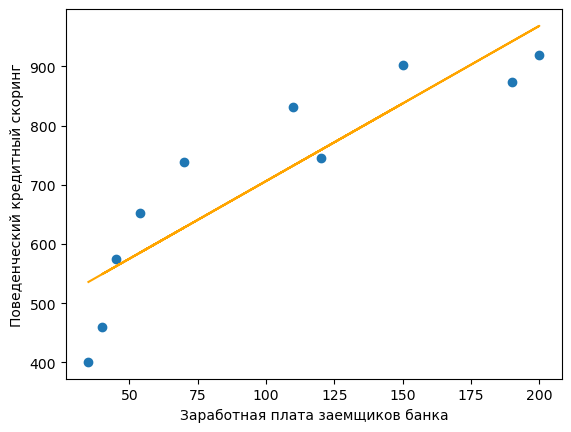

In [39]:
plt.scatter(zp, ks)
plt.plot(zp, a_intercept + b_intercept * zp, color='orange')
plt.xlabel('Заработная плата заемщиков банка')
plt.ylabel('Поведенческий кредитный скоринг')
plt.show()

---

**Задача 2**

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя
градиентный спуск (без intercept).

In [47]:
import numpy as np

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)
alpha = 1e-6
b = 0.1  
  
iterations = 700

def mse_(b, y = ks, x = zp, n = n):
    return np.sum((b * x - y)**2) / n


for i in range(iterations):
    b -= alpha * (2/n) * np.sum((b * zp - ks) * zp)     
    if i % 100 == 0:
        print("Iteration: {0}, MSE: {1:.3f}, b: {2:.3f}".format(i, mse_(b), b))

Iteration: 0, MSE: 493237.721, b: 0.260
Iteration: 100, MSE: 58151.318, b: 5.545
Iteration: 200, MSE: 56522.976, b: 5.869
Iteration: 300, MSE: 56516.881, b: 5.889
Iteration: 400, MSE: 56516.859, b: 5.890
Iteration: 500, MSE: 56516.858, b: 5.890
Iteration: 600, MSE: 56516.858, b: 5.890


*Коэффициент линейной регрессии* при заработной плате (zp), используя
градиентный спуск (без intercept) = 5,890

---

**Задача 3 (Дополнительно)**

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что
изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно
влиять на изменение другого во время одной итерации).

In [83]:
import numpy as np

def mse(y, y_pred):
    return np.mean((y - y_pred)**2)
 
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

alpha = 1e-6
koef = np.array([0.1, 0.1])
n = len(zp)
for i in range(10000):
    y_pred = koef[0] + koef[1]*zp
    err = mse_(ks, y_pred)
    koef -= alpha * (1/n * 2 * np.array([np.sum(y_pred - ks), np.sum((y_pred - ks)*zp)]))
    if i % 1000 == 0:
        print('Iteration: {i}, koef: {koef}, mse: {err}'.format(i=i, koef=koef, err=err))
    if err < 50:
        break
print("Коэффициенты линейной регрессии: a = {:.2f}, b = {:.2f}".format(koef[0], koef[1]))

Iteration: 0, koef: [0.10139932 0.2595078 ], mse: 10115122893.904001
Iteration: 1000, koef: [0.3680363 5.8871717], mse: 9979756301.853184
Iteration: 2000, koef: [0.59312476 5.88551495], mse: 9979758650.835354
Iteration: 3000, koef: [0.81809907 5.88385904], mse: 9979760998.651962
Iteration: 4000, koef: [1.04295927 5.88220397], mse: 9979763345.303478
Iteration: 5000, koef: [1.26770543 5.88054974], mse: 9979765690.790466
Iteration: 6000, koef: [1.49233761 5.87889635], mse: 9979768035.113491
Iteration: 7000, koef: [1.71685585 5.8772438 ], mse: 9979770378.27312
Iteration: 8000, koef: [1.94126023 5.87559208], mse: 9979772720.269909
Iteration: 9000, koef: [2.1655508 5.8739412], mse: 9979775061.104431
Коэффициенты линейной регрессии: a = 2.39, b = 5.87


In [87]:
import numpy as np
from sklearn.linear_model import LinearRegression

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]).reshape((-1, 1))
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

model = LinearRegression().fit(zp, ks)
print('Коэффициент пересечения (a):', model.intercept_)
print('Коэффициент наклона (b):', model.coef_[0])

Коэффициент пересечения (a): 444.1773573243596
Коэффициент наклона (b): 2.620538882402765
